In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
test = pd.read_csv('data/mnist_test.csv')
train = pd.read_csv('data/mnist_train.csv')

In [3]:
train_x = train['label']
test_x = test['label']

In [4]:
from sklearn.svm import SVC
del train["label"]
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_x) 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [5]:
res = test["label"]
del test["label"]
a = clf.predict(test)
len(a)

10000

In [6]:
accuracy_score(a,res)

0.9468

In [7]:
train_len = len(train)

In [8]:
data = pd.concat([train, test], axis=0)
data_labels = pd.concat([train_x, test_x], axis=0)
data_labels = data_labels.values.tolist()

In [9]:
map(int,data_labels)

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [11]:
principalDf['label'] = data_labels

In [12]:
principalDf

,principal component 1,principal component 2,label
0,122.257872,-316.237202,5
1,1010.493303,-289.970095,0
2,-58.991923,393.699715,4
3,-796.966715,-607.423798,1
4,-391.322469,729.806867,9
5,185.968522,223.869963,2
6,-730.485327,-161.999056,1
7,503.488957,-308.735946,3
8,-874.551109,-84.301982,1
9,-304.015566,463.579427,4


In [13]:
train, test = principalDf.iloc[:train_len, :], principalDf.iloc[train_len:, :]

In [14]:
test['pred'] = a

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


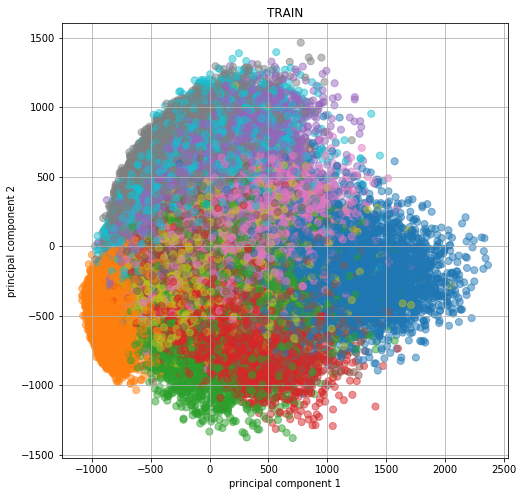

In [26]:
c = []
for i in train.values:
    if int(i[2]) == 0:
        c.append('C0')
    elif int(i[2]) == 1:
        c.append('C1')
    elif int(i[2]) == 2:
        c.append('C2')
    elif int(i[2]) == 3:
        c.append('C3')
    elif int(i[2]) == 4:
        c.append('C4')
    elif int(i[2]) == 5:
        c.append('C5')
    elif int(i[2]) == 6:
        c.append('C6')
    elif int(i[2]) == 7:
        c.append('C7')
    elif int(i[2]) == 8:
        c.append('C8')
    elif int(i[2]) == 9:
        c.append('C9')
    



plt1 = train.plot.scatter(x = "principal component 1", y="principal component 2", 
                        c = c, s = 50, alpha = 0.5,figsize = (8,8),grid = True,title="TRAIN")



In [16]:
#Grid size for test for perfect size

max_1 = test.loc[test['principal component 1'].idxmax()]['principal component 1']

max_2 = test.loc[test['principal component 2'].idxmax()]['principal component 2']

min_1 = test.loc[test['principal component 1'].idxmin()]['principal component 1']

min_2 = test.loc[test['principal component 2'].idxmin()]['principal component 2']

x_axis = round((max_1 - min_1)/10)

y_axis = round((max_2-min_2)/10)

x_axis = x_axis.as_integer_ratio()[0]

y_axis = y_axis.as_integer_ratio()[0]

x_l = []
y_l = []
for i in range(0,11):
    x_l.append(round(min_1 + x_axis*i))

for i in range(0,11):
    y_l.append(round(min_2 + y_axis*i))


In [17]:
x_l

[-1079.0,
 -733.0,
 -387.0,
 -41.0,
 305.0,
 651.0,
 997.0,
 1343.0,
 1689.0,
 2035.0,
 2381.0]

In [18]:
y_l

[-1429.0,
 -1157.0,
 -885.0,
 -613.0,
 -341.0,
 -69.0,
 203.0,
 475.0,
 747.0,
 1019.0,
 1291.0]

In [19]:
def genXY(h,data):
    """
    generate x and y grid values of height h
    """
    minx = min(data['principal component 1'])
    maxx = max(data['principal component 1']) + 1
    numDivX = round((maxx - minx)/h)
    print(numDivX)
    x_l = []
    for i in range(1,numDivX+1):
        x_l.append((i*h) +minx)
    
    if(x_l[len(x_l)-1] != maxx):
        x_l.append(maxx)
        
        
    miny = min(data['principal component 2'])
    maxy = max(data['principal component 2'])
    numDivY = round((maxy - miny)/h)
    print(numDivY)
    y_l = []
    for i in range(1,numDivY+1):
        y_l.append((i*h) + miny)
    
    if(y_l[len(y_l)-1] != maxy):
        y_l.append(maxy)
    
    return x_l,y_l
        

In [38]:
x_l_1, y_l_1 = genXY(100,test)

35
27


In [39]:
c = []
for i in test.values:
    if int(i[2]) == 0:
        c.append('C0')
    elif int(i[2]) == 1:
        c.append('C1')
    elif int(i[2]) == 2:
        c.append('C2')
    elif int(i[2]) == 3:
        c.append('C3')
    elif int(i[2]) == 4:
        c.append('C4')
    elif int(i[2]) == 5:
        c.append('C5')
    elif int(i[2]) == 6:
        c.append('C6')
    elif int(i[2]) == 7:
        c.append('C7')
    elif int(i[2]) == 8:
        c.append('C8')
    elif int(i[2]) == 9:
        c.append('C9')
    



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


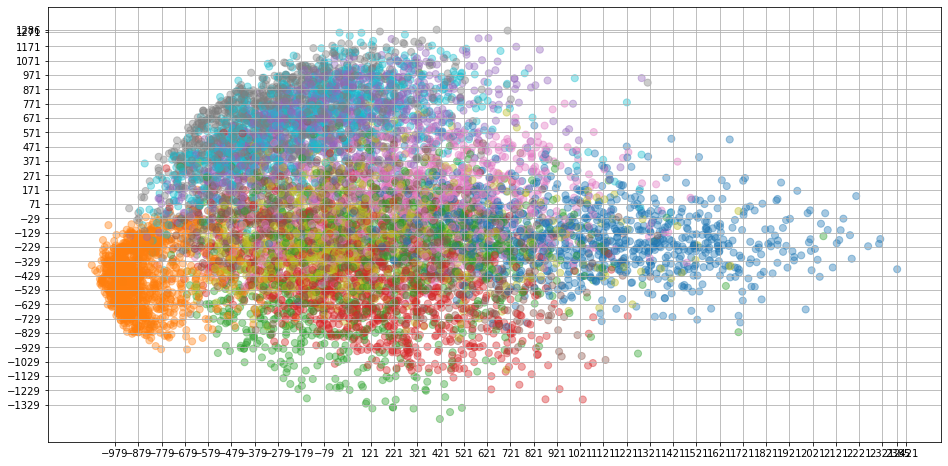

In [40]:


fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50
              , alpha = 0.4)

ax.grid()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


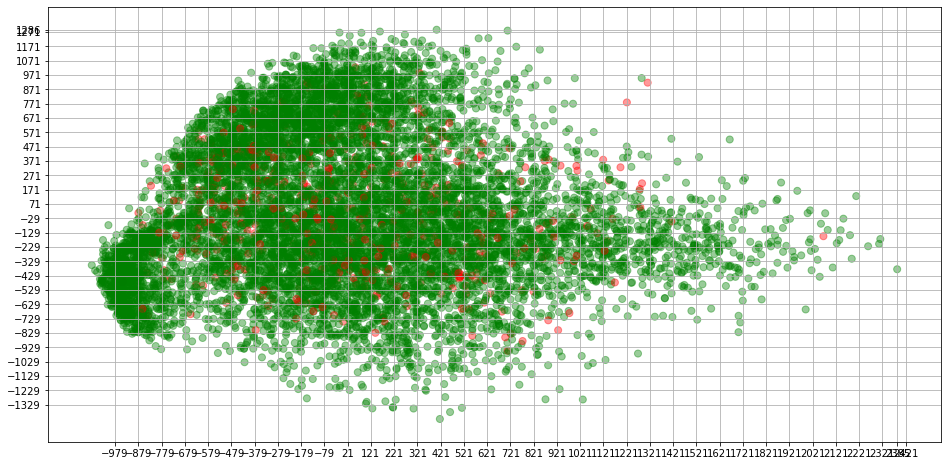

In [41]:
test["color"] = test["label"] == test["pred"]
c = []
for i in test["color"]:
    if i:
        c.append('g')
    else:
        c.append('r')

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50
              , alpha = 0.4)

ax.grid()

In [42]:
accuracy_score(test.pred,test.label)

0.9468

In [43]:
def inWindows(x1,x2,y1,y2,x,y):
    if (x >= x1 and x < x2) and (y>=y1 and y<y2):
        return True
    return False

In [44]:
def genDensityMetric(data,x_l,y_l):
    """
     get count of data points in a grid line and accuracy percentage
    """
    densityMap = []
    count = len(data)
    for x in range(len(x_l)-1):
        for y in range(len(y_l)-1):
            results = []
            preds = []
            density = 0
            for i in data.values:
                if(inWindows(x_l[x],x_l[x+1],y_l[y],y_l[y+1],i[0],i[1])):
                    results.append(i[3])
                    preds.append(i[2])
                    density = density + 1
            if density != 0:
                f1 = f1_score(results,preds,average='micro')
                acc = accuracy_score(results,preds)
                rec = recall_score(results,preds, average='micro')
                prec = precision_score(results,preds, average='micro')
                densityMap.append([x_l[x+1],y_l[y+1],density,density/count,acc,f1,rec,prec])
    dm = pd.DataFrame(data = densityMap, columns=['x','y','num points','density','accuracy score','f1 score','recall score','precision score'])
    return dm
            

In [45]:
densityMap = genDensityMetric(test,x_l_1,y_l_1)

In [46]:
densityMap.sort_values(by=['density'],ascending=False)

,x,y,num points,density,accuracy score,f1 score,recall score,precision score
5,-879.481915,-328.857055,82,0.0082,1.000000,1.000000,1.000000,1.000000
4,-879.481915,-428.857055,81,0.0081,0.987654,0.987654,0.987654,0.987654
18,-779.481915,-128.857055,81,0.0081,0.987654,0.987654,0.987654,0.987654
6,-879.481915,-228.857055,80,0.0080,1.000000,1.000000,1.000000,1.000000
3,-879.481915,-528.857055,75,0.0075,1.000000,1.000000,1.000000,1.000000
179,20.518085,-228.857055,64,0.0064,0.953125,0.953125,0.953125,0.953125
164,-79.481915,671.142945,64,0.0064,0.984375,0.984375,0.984375,0.984375
2,-879.481915,-628.857055,63,0.0063,1.000000,1.000000,1.000000,1.000000
116,-279.481915,671.142945,61,0.0061,0.983607,0.983607,0.983607,0.983607
181,20.518085,-28.857055,59,0.0059,0.932203,0.932203,0.932203,0.932203


In [48]:
densityMap.sort_values(by=['accuracy score'],ascending=True)

,x,y,num points,density,accuracy score,f1 score,recall score,precision score
486,1320.518085,871.142945,1,0.0001,0.000000,0.000000,0.000000,0.000000
482,1320.518085,271.142945,2,0.0002,0.000000,0.000000,0.000000,0.000000
424,1020.518085,-728.857055,1,0.0001,0.000000,0.000000,0.000000,0.000000
403,920.518085,-728.857055,1,0.0001,0.000000,0.000000,0.000000,0.000000
558,2120.518085,-128.857055,1,0.0001,0.000000,0.000000,0.000000,0.000000
435,1020.518085,371.142945,4,0.0004,0.250000,0.250000,0.250000,0.250000
487,1320.518085,971.142945,2,0.0002,0.500000,0.500000,0.500000,0.500000
378,820.518085,-828.857055,6,0.0006,0.666667,0.666667,0.666667,0.666667
457,1120.518085,471.142945,3,0.0003,0.666667,0.666667,0.666667,0.666667
308,520.518085,-428.857055,22,0.0022,0.727273,0.727273,0.727273,0.727273
